# Optimizer Example
MNIST CNN example showing comparison between optimizers which were around when Adam was introduced.  This is a classification problem.

Richard Henry, 15-Jul-2024 

Adapted from Keras Documentation. https://keras.io/examples/vision/mnist_convnet/

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|CNN|Contemporary|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(mClass, 
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, RMSprop

In [7]:
%%time
h0=model_build('rmsprop',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8302 - loss: 0.5804 - val_accuracy: 0.9780 - val_loss: 0.0771
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9696 - loss: 0.1001 - val_accuracy: 0.9848 - val_loss: 0.0544
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9780 - loss: 0.0693 - val_accuracy: 0.9875 - val_loss: 0.0483
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9825 - loss: 0.0556 - val_accuracy: 0.9892 - val_loss: 0.0411
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9892 - val_loss: 0.0391
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9868 - loss: 0.0417 - val_accuracy: 0.9898 - val_loss: 0.0360
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9890 - loss: 0.0363 - val_accuracy: 0.9905 - val_loss: 0.0373
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9889 - loss: 0.

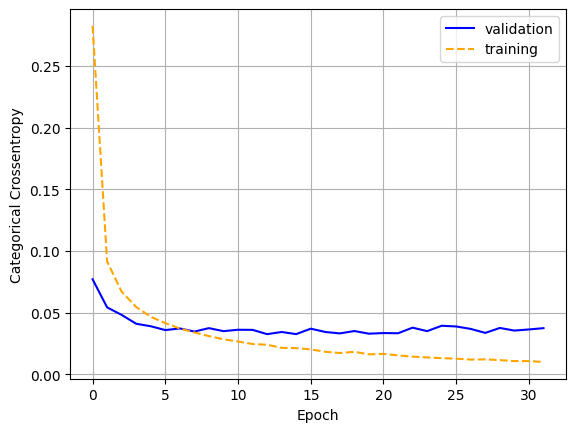

In [8]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h0.history['loss'],color='orange',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['validation','training'])
plt.grid()
plt.show()

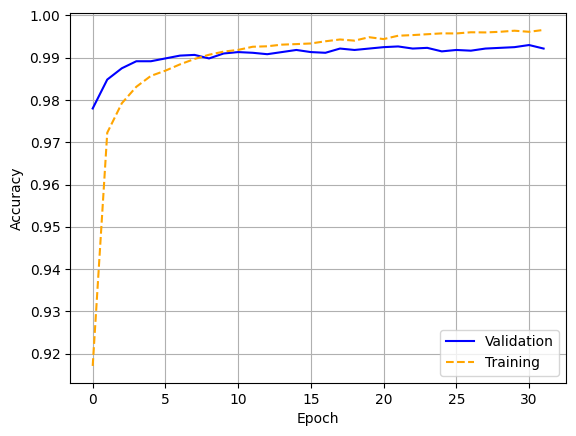

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h0.history['accuracy'],color='orange',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation','Training'])
plt.grid()
plt.show()

### Second Model, AdaGrad

In [10]:
%%time
h1=model_build('adagrad',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.2223 - loss: 2.2483 - val_accuracy: 0.6762 - val_loss: 2.0138
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5845 - loss: 1.8772 - val_accuracy: 0.7895 - val_loss: 1.2417
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7119 - loss: 1.1696 - val_accuracy: 0.8453 - val_loss: 0.7233
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7717 - loss: 0.7994 - val_accuracy: 0.8767 - val_loss: 0.5290
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8083 - loss: 0.6491 - val_accuracy: 0.8940 - val_loss: 0.4357
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8262 - loss: 0.5725 - val_accuracy: 0.9030 - val_loss: 0.3790
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8446 - loss: 0.5173 - val_accuracy: 0.9095 - val_loss: 0.3421
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8568 - loss: 0.

### Third Model, SGD + Nesterov Mommentum

In [11]:
opt012=tf.keras.optimizers.SGD(momentum=0.5,
                               nesterov=True,
                               name='nSGD'
                              )

In [12]:
%%time
h2=model_build(opt012,num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5117 - loss: 1.5544 - val_accuracy: 0.9267 - val_loss: 0.2668
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8933 - loss: 0.3544 - val_accuracy: 0.9552 - val_loss: 0.1714
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9286 - loss: 0.2400 - val_accuracy: 0.9652 - val_loss: 0.1350
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9422 - loss: 0.1891 - val_accuracy: 0.9698 - val_loss: 0.1144
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9528 - loss: 0.1598 - val_accuracy: 0.9737 - val_loss: 0.1003
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9576 - loss: 0.1415 - val_accuracy: 0.9745 - val_loss: 0.0930
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9614 - loss: 0.1289 - val_accuracy: 0.9763 - val_loss: 0.0858
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9649 - loss: 0.

### 4th Model, Adam

In [13]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7990 - loss: 0.7151 - val_accuracy: 0.9772 - val_loss: 0.0792
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9702 - loss: 0.0985 - val_accuracy: 0.9833 - val_loss: 0.0555
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9788 - loss: 0.0710 - val_accuracy: 0.9865 - val_loss: 0.0480
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9828 - loss: 0.0558 - val_accuracy: 0.9878 - val_loss: 0.0414
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9847 - loss: 0.0482 - val_accuracy: 0.9902 - val_loss: 0.0383
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9902 - val_loss: 0.0392
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9886 - loss: 0.0349 - val_accuracy: 0.9908 - val_loss: 0.0364
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9890 - loss: 0.

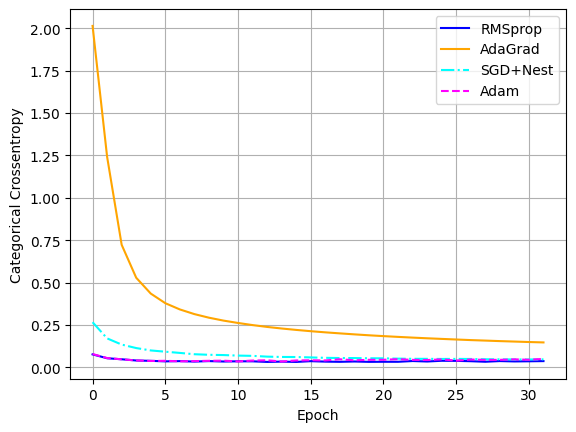

In [14]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

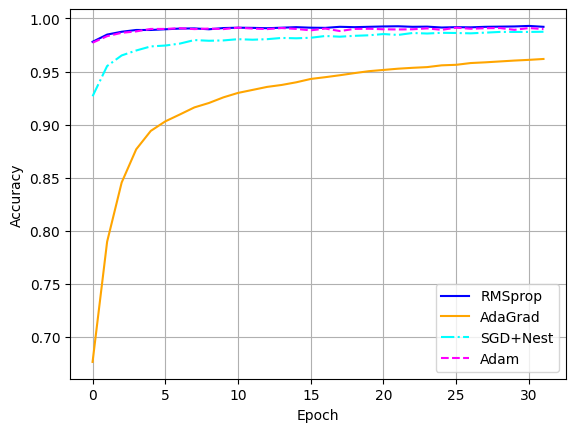

In [15]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

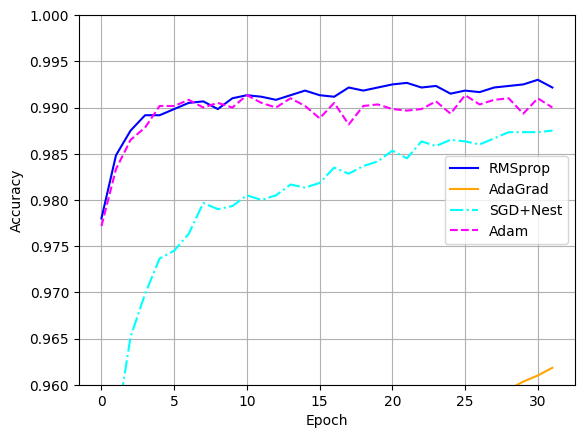

In [16]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.ylim([0.96,1.00])
plt.show()

In [17]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)